In [468]:
import math as m
import pandas as pd
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter
from lifelines.statistics import logrank_test

In [2]:
mat_data = io.loadmat('C:\\Users\\as17s\\OneDrive\\Documents\\MSc Data Science\\Semester 1\\Machine Learning\\ALS_data.mat')

In [3]:
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Dec  9 21:34:16 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Dt': array([[557, 525, 496, ..., 214, 149,  92]], dtype=uint16),
 'censored': array([[0, 0, 0, ..., 1, 1, 1]], dtype=uint8),
 'data': array([[0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.1783560e-03,
         6.8362010e-06, 6.1991666e-03],
        [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.1783560e-03,
         6.3103394e-06, 3.7195000e-03],
        [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.1783560e-03,
         6.3103394e-06, 2.4796668e-03],
        ...,
        [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.7773091e-03,
         2.3137911e-05, 6.1991666e-03],
        [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.5551455e-03,
         3.6810314e-05, 8.6788340e-03],
        [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.5329291e-03,
         2.4189634e-05, 7.4390001e-03]], dtype=float32),
 'labels': a

In [4]:
data = mat_data['data']
target = mat_data['survived']
Dt = mat_data['Dt']
censored = mat_data['censored']
labels = mat_data['labels']

In [5]:
labels1 = np.zeros(59, dtype = '<U30')

In [6]:
for i in range(len(labels1)):
    labels1[i] = labels[0][i][0]

In [7]:
Df = pd.DataFrame(data, columns = labels1)

In [8]:
Df

,Gender0,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,...,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.003720
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008262,0.076904,0.000028,0.012927,0.011980,0.012346,0.026432,0.001178,0.000006,0.002480
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007696,0.084860,0.000012,0.011491,0.011296,0.015309,0.016820,0.001178,0.000006,0.002480
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008148,0.074252,0.000013,0.011778,0.011207,0.014815,0.016820,0.001178,0.000004,0.004959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199
16173,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007922,0.103447,0.000042,0.013215,0.015161,0.012840,0.016820,0.001577,0.000037,0.003720
16174,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008375,0.140393,0.000036,0.012927,0.016052,0.012346,0.016820,0.001777,0.000023,0.006199
16175,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007243,0.116584,0.000039,0.011491,0.014863,0.014321,0.028835,0.001555,0.000037,0.008679


In [11]:
Dt = Dt[0]

In [12]:
pd.Series(Dt).value_counts()

0      803
63     167
553    164
245    164
427    158
      ... 
850      1
906      1
3        1
627      1
675      1
Length: 645, dtype: int64

In [15]:
target.shape

(16177, 6)

In [17]:
pd.options.display.max_columns = None

In [18]:
Df

,Gender0,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.003878,0.002810,0.002222,0.003281,0.003346,0.007397,0.000023,0.000003,0.017361,0.005370,0.000023,0.062252,0.003591,0.000340,0.004832,0.013750,0.069333,0.001370,0.000097,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.003720
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.002346,0.003229,0.003314,0.007325,0.000037,0.000003,0.015218,0.006824,0.000028,0.062967,0.003728,0.000307,0.004762,0.022917,0.076444,0.001096,0.000101,0.008262,0.076904,0.000028,0.012927,0.011980,0.012346,0.026432,0.001178,0.000006,0.002480
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002789,0.002253,0.003263,0.003141,0.007756,0.000018,0.000003,0.015646,0.005649,0.000023,0.059389,0.003563,0.000335,0.004937,0.013750,0.072889,0.001644,0.000097,0.007696,0.084860,0.000012,0.011491,0.011296,0.015309,0.016820,0.001178,0.000006,0.002480
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002686,0.002469,0.003233,0.003346,0.007325,0.000018,0.000003,0.018861,0.005146,0.000027,0.057958,0.003563,0.000373,0.004832,0.014896,0.081778,0.001370,0.000097,0.008148,0.074252,0.000013,0.011778,0.011207,0.014815,0.016820,0.001178,0.000004,0.004959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.004592,0.002893,0.001975,0.003537,0.003081,0.007397,0.000034,0.000009,0.015003,0.005745,0.000020,0.069689,0.004578,0.000359,0.005042,0.019051,0.076444,0.001442,0.000116,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199
16173,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.1875,0.1250,0.1250,0.1875,0.2500,0.2500,0.2500,0.2500,0.003571,0.003099,0.002778,0.003515,0.002109,0.007110,0.000035,0.000009,0.012860,0.005946,0.000021,0.070263,0.004742,0.000399,0.004797,0.013433,0.094222,0.001122,0.000118,0.007922,0.103447,0.000042,0.013215,0.015161,0.012840,0.016820,0.001577,0.000037,0.003720
16174,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.0625,0.187

In [22]:
Df.drop(columns = ['Gender0'], inplace = True)

In [23]:
Df

,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.003878,0.002810,0.002222,0.003281,0.003346,0.007397,0.000023,0.000003,0.017361,0.005370,0.000023,0.062252,0.003591,0.000340,0.004832,0.013750,0.069333,0.001370,0.000097,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.003720
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.002346,0.003229,0.003314,0.007325,0.000037,0.000003,0.015218,0.006824,0.000028,0.062967,0.003728,0.000307,0.004762,0.022917,0.076444,0.001096,0.000101,0.008262,0.076904,0.000028,0.012927,0.011980,0.012346,0.026432,0.001178,0.000006,0.002480
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002789,0.002253,0.003263,0.003141,0.007756,0.000018,0.000003,0.015646,0.005649,0.000023,0.059389,0.003563,0.000335,0.004937,0.013750,0.072889,0.001644,0.000097,0.007696,0.084860,0.000012,0.011491,0.011296,0.015309,0.016820,0.001178,0.000006,0.002480
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002686,0.002469,0.003233,0.003346,0.007325,0.000018,0.000003,0.018861,0.005146,0.000027,0.057958,0.003563,0.000373,0.004832,0.014896,0.081778,0.001370,0.000097,0.008148,0.074252,0.000013,0.011778,0.011207,0.014815,0.016820,0.001178,0.000004,0.004959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.004592,0.002893,0.001975,0.003537,0.003081,0.007397,0.000034,0.000009,0.015003,0.005745,0.000020,0.069689,0.004578,0.000359,0.005042,0.019051,0.076444,0.001442,0.000116,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199
16173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.1875,0.1250,0.1250,0.1875,0.2500,0.2500,0.2500,0.2500,0.003571,0.003099,0.002778,0.003515,0.002109,0.007110,0.000035,0.000009,0.012860,0.005946,0.000021,0.070263,0.004742,0.000399,0.004797,0.013433,0.094222,0.001122,0.000118,0.007922,0.103447,0.000042,0.013215,0.015161,0.012840,0.016820,0.001577,0.000037,0.003720
16174,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.0625,0.1875,0.1875,0.0625,0.0625,0.0625,0.1875,0.1875,

In [24]:
Df['time'] = Dt

In [25]:
Df

,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount,time
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199,557
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.003878,0.002810,0.002222,0.003281,0.003346,0.007397,0.000023,0.000003,0.017361,0.005370,0.000023,0.062252,0.003591,0.000340,0.004832,0.013750,0.069333,0.001370,0.000097,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.003720,525
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.002346,0.003229,0.003314,0.007325,0.000037,0.000003,0.015218,0.006824,0.000028,0.062967,0.003728,0.000307,0.004762,0.022917,0.076444,0.001096,0.000101,0.008262,0.076904,0.000028,0.012927,0.011980,0.012346,0.026432,0.001178,0.000006,0.002480,496
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002789,0.002253,0.003263,0.003141,0.007756,0.000018,0.000003,0.015646,0.005649,0.000023,0.059389,0.003563,0.000335,0.004937,0.013750,0.072889,0.001644,0.000097,0.007696,0.084860,0.000012,0.011491,0.011296,0.015309,0.016820,0.001178,0.000006,0.002480,462
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002686,0.002469,0.003233,0.003346,0.007325,0.000018,0.000003,0.018861,0.005146,0.000027,0.057958,0.003563,0.000373,0.004832,0.014896,0.081778,0.001370,0.000097,0.008148,0.074252,0.000013,0.011778,0.011207,0.014815,0.016820,0.001178,0.000004,0.004959,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.004592,0.002893,0.001975,0.003537,0.003081,0.007397,0.000034,0.000009,0.015003,0.005745,0.000020,0.069689,0.004578,0.000359,0.005042,0.019051,0.076444,0.001442,0.000116,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199,330
16173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.1875,0.1250,0.1250,0.1875,0.2500,0.2500,0.2500,0.2500,0.003571,0.003099,0.002778,0.003515,0.002109,0.007110,0.000035,0.000009,0.012860,0.005946,0.000021,0.070263,0.004742,0.000399,0.004797,0.013433,0.094222,0.001122,0.000118,0.007922,0.103447,0.000042,0.013215,0.015161,0.012840,0.016820,0.001577,0.000037,0.003720,274
16174,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.0625,0.1875,0.187

In [34]:
target = target.astype(int)

In [35]:
target.shape

(16177, 6)

In [36]:
trim1, trim2, trim3, trim4, trim5, trim6 = target[:,0], target[:,1], target[:,2], target[:,3], target[:,4], target[:,5]

In [37]:
Df['trim1'], Df['trim2'], Df['trim3'], Df['trim4'], Df['trim5'], Df['trim6'] = trim1, trim2, trim3, trim4, trim5, trim6

In [38]:
Df

,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount,time,trim1,trim2,trim3,trim4,trim5,trim6
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199,557,1,1,1,1,1,1
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.003878,0.002810,0.002222,0.003281,0.003346,0.007397,0.000023,0.000003,0.017361,0.005370,0.000023,0.062252,0.003591,0.000340,0.004832,0.013750,0.069333,0.001370,0.000097,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.003720,525,1,1,1,1,1,0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.002346,0.003229,0.003314,0.007325,0.000037,0.000003,0.015218,0.006824,0.000028,0.062967,0.003728,0.000307,0.004762,0.022917,0.076444,0.001096,0.000101,0.008262,0.076904,0.000028,0.012927,0.011980,0.012346,0.026432,0.001178,0.000006,0.002480,496,1,1,1,1,1,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002789,0.002253,0.003263,0.003141,0.007756,0.000018,0.000003,0.015646,0.005649,0.000023,0.059389,0.003563,0.000335,0.004937,0.013750,0.072889,0.001644,0.000097,0.007696,0.084860,0.000012,0.011491,0.011296,0.015309,0.016820,0.001178,0.000006,0.002480,462,1,1,1,1,1,0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002686,0.002469,0.003233,0.003346,0.007325,0.000018,0.000003,0.018861,0.005146,0.000027,0.057958,0.003563,0.000373,0.004832,0.014896,0.081778,0.001370,0.000097,0.008148,0.074252,0.000013,0.011778,0.011207,0.014815,0.016820,0.001178,0.000004,0.004959,440,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.004592,0.002893,0.001975,0.003537,0.003081,0.007397,0.000034,0.000009,0.015003,0.005745,0.000020,0.069689,0.004578,0.000359,0.005042,0.019051,0.076444,0.001442,0.000116,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199,330,1,1,1,-1,-1,-1
16173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.1875,0.1250,0.1250,0.1875,0.2500,0.2500,0.2500,0.2500,0.003571,0.003099,0.002778,0.003515,0.002109,0.007110,0.000035,0.000009,0.012860,0.005946,0.000021,0.070263,0.004742,0.000399,0.004797,0.013433,0.094222,0.001122,0.000118,0.007922,0.103447,0.000042,0.013215,0.015161,0.012840,0.016820,

In [41]:
id1 = io.loadmat('C:\\Users\\as17s\\OneDrive\\Documents\\MSc Data Science\\Survival analysis\\PROACT_data_add.mat')

In [42]:
id1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Apr 30 14:17:04 2021',
 '__version__': '1.0',
 '__globals__': [],
 'Age': array([[48],
        [48],
        [48],
        ...,
        [48],
        [48],
        [48]], dtype=uint8),
 'Age_at_onset': array([[48.93424658],
        [48.93424658],
        [48.93424658],
        ...,
        [48.55890411],
        [48.55890411],
        [48.55890411]]),
 'Pat_ID': array([[   649],
        [   649],
        [   649],
        ...,
        [999482],
        [999482],
        [999482]])}

In [61]:
id1['Age']

array([[48],
       [48],
       [48],
       ...,
       [48],
       [48],
       [48]], dtype=uint8)

In [62]:
Df['Age'] = id1['Age']

In [65]:
Df['ID'] = id1['Pat_ID']

In [66]:
Df

,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount,time,trim1,trim2,trim3,trim4,trim5,trim6,Age,ID
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199,557,1,1,1,1,1,1,48,649
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.003878,0.002810,0.002222,0.003281,0.003346,0.007397,0.000023,0.000003,0.017361,0.005370,0.000023,0.062252,0.003591,0.000340,0.004832,0.013750,0.069333,0.001370,0.000097,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.003720,525,1,1,1,1,1,0,48,649
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.002346,0.003229,0.003314,0.007325,0.000037,0.000003,0.015218,0.006824,0.000028,0.062967,0.003728,0.000307,0.004762,0.022917,0.076444,0.001096,0.000101,0.008262,0.076904,0.000028,0.012927,0.011980,0.012346,0.026432,0.001178,0.000006,0.002480,496,1,1,1,1,1,0,48,649
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002789,0.002253,0.003263,0.003141,0.007756,0.000018,0.000003,0.015646,0.005649,0.000023,0.059389,0.003563,0.000335,0.004937,0.013750,0.072889,0.001644,0.000097,0.007696,0.084860,0.000012,0.011491,0.011296,0.015309,0.016820,0.001178,0.000006,0.002480,462,1,1,1,1,1,0,48,649
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002686,0.002469,0.003233,0.003346,0.007325,0.000018,0.000003,0.018861,0.005146,0.000027,0.057958,0.003563,0.000373,0.004832,0.014896,0.081778,0.001370,0.000097,0.008148,0.074252,0.000013,0.011778,0.011207,0.014815,0.016820,0.001178,0.000004,0.004959,440,1,1,1,1,0,0,48,649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.004592,0.002893,0.001975,0.003537,0.003081,0.007397,0.000034,0.000009,0.015003,0.005745,0.000020,0.069689,0.004578,0.000359,0.005042,0.019051,0.076444,0.001442,0.000116,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199,330,1,1,1,-1,-1,-1,48,999482
16173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.1875,0.1250,0.1250,0.1875,0.2500,0.2500,0.2500,0.2500,0.003571,0.003099,0.002778,0.003515,0.002109,0.007110,0.000035,0.000009,0.012860,0.005946,0.000021,0.070263,0.004742,0.000399,0.004797,0.013433,0.094222,0.001122,0.000118,0.0

In [67]:
cols = Df.columns.tolist()

In [68]:
cols

['Gender1',
 'Age_atOnset0',
 'Age_atOnset1',
 'Age_atOnset2',
 'Race1',
 'Race2',
 'Race3',
 'Race4',
 'Race5',
 'Race6',
 'onset_delta0',
 'onset_delta1',
 'onset_delta2',
 'onset_site0',
 'onset_site1',
 'onset_site2',
 'if_use_Riluzole0',
 'if_use_Riluzole1',
 'Q1_Speech',
 'Q2_Salivation',
 'Q3_Swallowing',
 'Q4_Handwriting',
 'Q5a_Cutting_without_Gastrostom',
 'Q5_Cutting',
 'Q6_Dressing_and_Hygiene',
 'Q7_Turning_in_Bed',
 'Q8_Walking',
 'Q9_Climbing_Stairs',
 'Q10_Respiratory',
 'bp_diastolic',
 'bp_systolic',
 'pulse',
 'weight',
 'fvc_percent',
 'Chloride',
 'ASTSGOT',
 'CK',
 'WhiteBloodCellWBC',
 'Glucose',
 'AlkalinePhosphatase',
 'Calcium',
 'Hemoglobin',
 'Platelets',
 'Sodium',
 'BloodUreaNitrogenBUN',
 'Potassium',
 'BilirubinTotal',
 'RedBloodCellsRBC',
 'Protein',
 'Phosphorus',
 'ALTSGPT',
 'Albumin',
 'Hematocrit',
 'Bicarbonate',
 'AbsoluteEosinophilCount',
 'Creatinine',
 'Gammaglutamyltransferase',
 'AbsoluteBasophilCount',
 'time',
 'trim1',
 'trim2',
 'trim3',

In [76]:
cols = cols[-9:] + cols[:-9]

In [79]:
Df = Df[cols]

In [80]:
Df

,time,trim1,trim2,trim3,trim4,trim5,trim6,Age,ID,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount
0,557,1,1,1,1,1,1,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199
1,525,1,1,1,1,1,0,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.003878,0.002810,0.002222,0.003281,0.003346,0.007397,0.000023,0.000003,0.017361,0.005370,0.000023,0.062252,0.003591,0.000340,0.004832,0.013750,0.069333,0.001370,0.000097,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.003720
2,496,1,1,1,1,1,0,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.002346,0.003229,0.003314,0.007325,0.000037,0.000003,0.015218,0.006824,0.000028,0.062967,0.003728,0.000307,0.004762,0.022917,0.076444,0.001096,0.000101,0.008262,0.076904,0.000028,0.012927,0.011980,0.012346,0.026432,0.001178,0.000006,0.002480
3,462,1,1,1,1,1,0,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002789,0.002253,0.003263,0.003141,0.007756,0.000018,0.000003,0.015646,0.005649,0.000023,0.059389,0.003563,0.000335,0.004937,0.013750,0.072889,0.001644,0.000097,0.007696,0.084860,0.000012,0.011491,0.011296,0.015309,0.016820,0.001178,0.000006,0.002480
4,440,1,1,1,1,0,0,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002686,0.002469,0.003233,0.003346,0.007325,0.000018,0.000003,0.018861,0.005146,0.000027,0.057958,0.003563,0.000373,0.004832,0.014896,0.081778,0.001370,0.000097,0.008148,0.074252,0.000013,0.011778,0.011207,0.014815,0.016820,0.001178,0.000004,0.004959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,330,1,1,1,-1,-1,-1,48,999482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.004592,0.002893,0.001975,0.003537,0.003081,0.007397,0.000034,0.000009,0.015003,0.005745,0.000020,0.069689,0.004578,0.000359,0.005042,0.019051,0.076444,0.001442,0.000116,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199
16173,274,1,1,1,-1,-1,-1,48,999482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.1875,0.1250,0.1250,0.1875,0.2500,0.2500,0.2500,0.2500,0.003571,0.003099,0.002778,0.003515,0.002109,0.007110,0.000035,0.000009,0.012860,0.005946,0.000021,0.070263,0.004742,0.000399,0.004797,0.013433,0

In [97]:
ids = Df['ID'].unique()

In [103]:
x = max(Df.loc[Df['ID'] == ids[0]]['time'])
Df.drop(Df[(Df.ID == ids[0]) & (Df.time != x)].index)

,time,trim1,trim2,trim3,trim4,trim5,trim6,Age,ID,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount
0,557,1,1,1,1,1,1,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199
10,560,1,1,1,1,1,1,38,1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1875,0.2500,0.0000,0.0625,0.0625,0.0625,0.1250,0.1875,0.0625,0.2500,0.004082,0.002273,0.001852,0.004101,0.002152,0.007613,0.000023,0.000008,0.021005,0.005146,0.000027,0.067976,0.004331,0.000287,0.005007,0.016042,0.071111,0.001644,0.000111,0.008828,0.119334,0.000026,0.014076,0.014150,0.012840,0.120146,0.001964,0.000007,0.003720
11,549,1,1,1,1,1,1,38,1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1250,0.2500,0.0000,0.0625,0.0625,0.0000,0.1250,0.1875,0.0625,0.2500,0.003469,0.002211,0.002006,0.004101,0.003044,0.007541,0.000022,0.000008,0.019504,0.005090,0.000025,0.066545,0.004276,0.000265,0.004902,0.013750,0.071111,0.001370,0.000109,0.008375,0.119334,0.000021,0.014076,0.013853,0.012840,0.139369,0.001964,0.000007,0.002480
12,518,1,1,1,1,1,0,38,1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.2500,0.2500,0.0000,0.0625,0.0625,0.1250,0.1875,0.1875,0.0625,0.2500,0.003673,0.002231,0.002315,0.004131,0.002445,0.007541,0.000024,0.000013,0.021862,0.005258,0.000027,0.064398,0.004331,0.000299,0.005007,0.014896,0.069333,0.001370,0.000111,0.008375,0.106075,0.000028,0.013502,0.014596,0.014815,0.163399,0.001964,0.000008,0.000000
13,490,1,1,1,1,1,0,38,1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1875,0.2500,0.0000,0.0625,0.0625,0.0625,0.1875,0.1250,0.0625,0.2500,0.004388,0.002231,0.002284,0.004166,0.002563,0.007756,0.000024,0.000007,0.019719,0.004922,0.000028,0.065829,0.004139,0.000276,0.004972,0.017188,0.072889,0.001644,0.000105,0.008148,0.111378,0.000027,0.013502,0.013199,0.017284,0.069685,0.001964,0.000008,0.007439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,330,1,1,1,-1,-1,-1,48,999482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.004592,0.002893,0.001975,0.003537,0.003081,0.007397,0.000034,0.000009,0.015003,0.005745,0.000020,0.069689,0.004578,0.000359,0.005042,0.019051,0.076444,0.001442,0.000116,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199
16173,274,1,1,1,-1,-1,-1,48,999482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1250,0.1875,0.1875,0.1875,0.1250,0.1250,0.1875,0.2500,0.2500,0.2500,0.2500,0.003571,0.003099,0.002778,0.003515,0.002109,0.007110,0.000035,0.000009,0.012860,0.005946,0.000021,0.070263,0.004742,0.000399,0.004797,0.

In [107]:
uniqueDF = Df
for i in ids:
    x = max(uniqueDF.loc[uniqueDF['ID'] == i]['time'])
    uniqueDF = uniqueDF.drop(uniqueDF[(uniqueDF.ID == i) & (Df.time != x)].index)
    

<ipython-input-107-24428ee68b47>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uniqueDF = uniqueDF.drop(uniqueDF[(uniqueDF.ID == i) & (Df.time != x)].index)


In [108]:
uniqueDF

,time,trim1,trim2,trim3,trim4,trim5,trim6,Age,ID,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount
0,557,1,1,1,1,1,1,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199
10,560,1,1,1,1,1,1,38,1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1875,0.2500,0.0000,0.0625,0.0625,0.0625,0.1250,0.1875,0.0625,0.2500,0.004082,0.002273,0.001852,0.004101,0.002152,0.007613,0.000023,0.000008,0.021005,0.005146,0.000027,0.067976,0.004331,0.000287,0.005007,0.016042,0.071111,0.001644,0.000111,0.008828,0.119334,0.000026,0.014076,0.014150,0.012840,0.120146,0.001964,0.000007,0.003720
17,110,1,-1,-1,-1,-1,-1,41,2540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.0625,0.0625,0.0625,0.0000,0.2500,0.004592,0.002996,0.002593,0.003224,0.003411,0.007347,0.000027,0.000006,0.019933,0.004938,0.000021,0.069689,0.004167,0.000543,0.004867,0.012334,0.074667,0.001177,0.000102,0.008460,0.110192,0.000031,0.012812,0.013971,0.013333,0.048058,0.001000,0.000013,0.006819
21,589,1,1,1,1,1,1,63,2956,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.1875,0.1250,0.0000,0.2500,0.004184,0.002686,0.002284,0.002799,0.003406,0.007541,0.000030,0.000010,0.015646,0.005705,0.000035,0.062967,0.004084,0.000357,0.004867,0.013750,0.069333,0.001918,0.000099,0.008262,0.106075,0.000025,0.012927,0.013080,0.014815,0.007209,0.001178,0.000008,0.001240
29,552,1,1,1,1,1,1,36,3085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.003163,0.002231,0.001975,0.003012,0.003014,0.007469,0.000029,0.000012,0.009967,0.005090,0.000050,0.064398,0.003975,0.000259,0.004902,0.014896,0.075556,0.003015,0.000095,0.007752,0.102097,0.000026,0.013358,0.012931,0.012346,0.019223,0.001669,0.000010,0.002480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,551,1,1,1,1,1,1,61,998047,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1250,0.2500,0.1875,0.1875,0.1875,0.1250,0.1875,0.2500,0.2500,0.2500,0.004082,0.003099,0.002531,0.002170,0.002804,0.007613,0.000028,0.000009,0.017683,0.005341,0.000022,0.066821,0.003727,0.000289,0.005007,0.014563,0.069333,0.001122,0.000099,0.008488,0.096879,0.000020,0.012856,0.012188,0.013630,0.021626,0.001311,0.000017,0.004959
16151,171,1,-1,-1,-1,-1,-1,66,998764,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2500,0.2500,0.1875,0.1875,0.1875,0.1875,0.1250,0.1250,0.1250,0.0625,0.1875,0.004184,0.002851,0.002469,0.002122,0.002339,0.007469,0.000027,0.000003,0.015218,0.004810,0.000020,0.062252,0.003783,0.000289,0.00497

In [112]:
uniqueDF.loc[uniqueDF.trim6 == 1, 'dead'] = 0
uniqueDF.loc[uniqueDF.trim6 == 0, 'dead'] = 0
uniqueDF.loc[uniqueDF.trim6 == -1, 'dead'] = 1

In [113]:
uniqueDF

,time,trim1,trim2,trim3,trim4,trim5,trim6,Age,ID,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount,dead
0,557,1,1,1,1,1,1,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199,0.0
10,560,1,1,1,1,1,1,38,1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1875,0.2500,0.0000,0.0625,0.0625,0.0625,0.1250,0.1875,0.0625,0.2500,0.004082,0.002273,0.001852,0.004101,0.002152,0.007613,0.000023,0.000008,0.021005,0.005146,0.000027,0.067976,0.004331,0.000287,0.005007,0.016042,0.071111,0.001644,0.000111,0.008828,0.119334,0.000026,0.014076,0.014150,0.012840,0.120146,0.001964,0.000007,0.003720,0.0
17,110,1,-1,-1,-1,-1,-1,41,2540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.0625,0.0625,0.0625,0.0000,0.2500,0.004592,0.002996,0.002593,0.003224,0.003411,0.007347,0.000027,0.000006,0.019933,0.004938,0.000021,0.069689,0.004167,0.000543,0.004867,0.012334,0.074667,0.001177,0.000102,0.008460,0.110192,0.000031,0.012812,0.013971,0.013333,0.048058,0.001000,0.000013,0.006819,1.0
21,589,1,1,1,1,1,1,63,2956,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.1875,0.1250,0.0000,0.2500,0.004184,0.002686,0.002284,0.002799,0.003406,0.007541,0.000030,0.000010,0.015646,0.005705,0.000035,0.062967,0.004084,0.000357,0.004867,0.013750,0.069333,0.001918,0.000099,0.008262,0.106075,0.000025,0.012927,0.013080,0.014815,0.007209,0.001178,0.000008,0.001240,0.0
29,552,1,1,1,1,1,1,36,3085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.003163,0.002231,0.001975,0.003012,0.003014,0.007469,0.000029,0.000012,0.009967,0.005090,0.000050,0.064398,0.003975,0.000259,0.004902,0.014896,0.075556,0.003015,0.000095,0.007752,0.102097,0.000026,0.013358,0.012931,0.012346,0.019223,0.001669,0.000010,0.002480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,551,1,1,1,1,1,1,61,998047,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1250,0.2500,0.1875,0.1875,0.1875,0.1250,0.1875,0.2500,0.2500,0.2500,0.004082,0.003099,0.002531,0.002170,0.002804,0.007613,0.000028,0.000009,0.017683,0.005341,0.000022,0.066821,0.003727,0.000289,0.005007,0.014563,0.069333,0.001122,0.000099,0.008488,0.096879,0.000020,0.012856,0.012188,0.013630,0.021626,0.001311,0.000017,0.004959,0.0
16151,171,1,-1,-1,-1,-1,-1,66,998764,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2500,0.2500,0.1875,0.1875,0.1875,0.1875,0.1250,0.1250,0.1250,0.0625,0.1875,0.004184,0.002851,0.002469,0.002122,0.002339,0.007469,0.000027,0.000003,0.015218,0.004810,0.000020,0

In [114]:
kmf = KaplanMeierFitter()
kmf.fit(durations = uniqueDF['time'], event_observed = uniqueDF['dead'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1936 total observations, 1274 right-censored observations>

In [127]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1936,1936
65.0,1,1,0,0,1936
67.0,1,1,0,0,1935
68.0,1,1,0,0,1934
71.0,1,1,0,0,1933
...,...,...,...,...,...
669.0,1,0,1,0,5
716.0,1,0,1,0,4
796.0,1,0,1,0,3


In [116]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
65.0,0.999483
67.0,0.998967
68.0,0.998450
71.0,0.997934
...,...
669.0,0.645959
716.0,0.645959
796.0,0.645959


In [117]:
uniqueDF['dead'].value_counts()

0.0    1274
1.0     662
Name: dead, dtype: int64

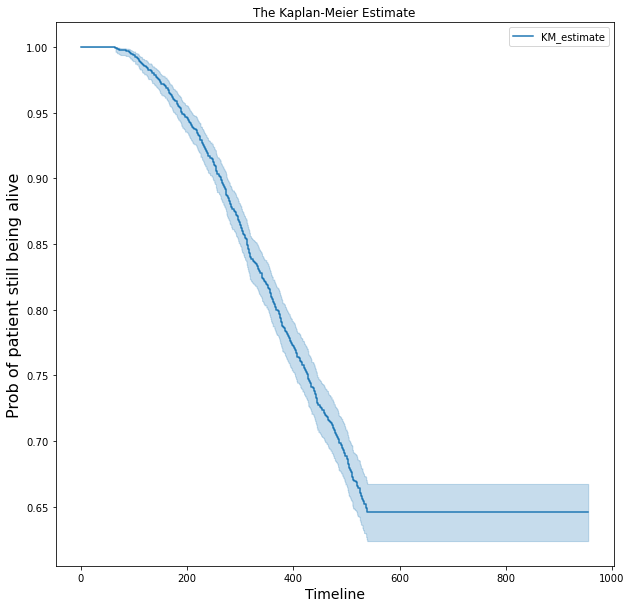

In [119]:
plt.figure(figsize = (10,10))
kmf.plot_survival_function()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Prob of patient still being alive", fontsize = 16)
plt.xlabel("Timeline", fontsize = 14)
plt.show()

In [128]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
65.0,0.996339,0.999927
67.0,0.995876,0.999742
68.0,0.995203,0.999500
71.0,0.994504,0.999224
...,...,...
669.0,0.623723,0.667251
716.0,0.623723,0.667251
796.0,0.623723,0.667251
934.0,0.623723,0.667251


In [130]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
65.0,0.000517
67.0,0.001033
68.0,0.001550
71.0,0.002066
...,...
669.0,0.354041
716.0,0.354041
796.0,0.354041


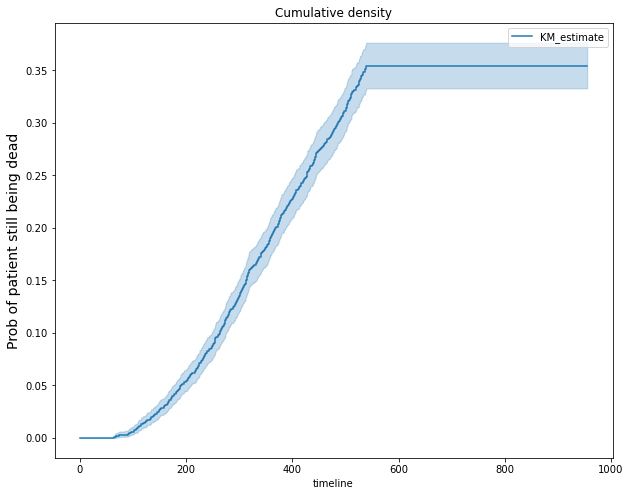

In [131]:
plt.figure(figsize = (10,8))
kmf.plot_cumulative_density()
plt.title("Cumulative density")
plt.ylabel("Prob of patient still being dead", fontsize = 14)
plt.show()

In [132]:
naf = NelsonAalenFitter()
naf.fit(uniqueDF['time'], event_observed = uniqueDF['dead'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 1936 total observations, 1274 right-censored observations>

In [133]:
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
65.0,0.000517
67.0,0.001033
68.0,0.001550
71.0,0.002068
...,...
669.0,0.436872
716.0,0.436872
796.0,0.436872


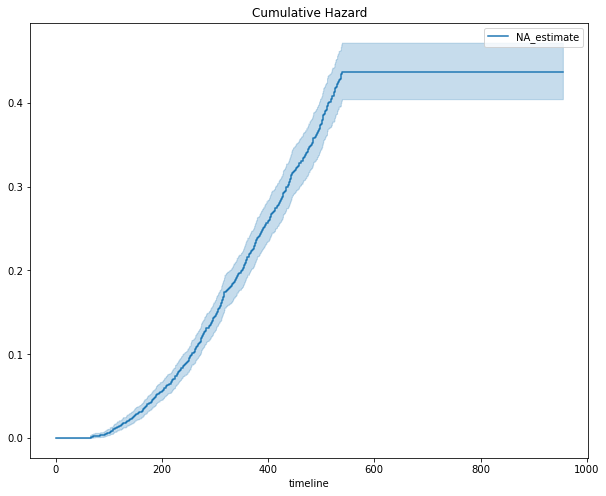

In [134]:
plt.figure(figsize = (10, 8))
naf.plot_cumulative_hazard()
plt.title('Cumulative Hazard')
plt.show()

In [135]:
kmf_m = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()

In [140]:
Male = uniqueDF.query("Gender1 == 1")
Female = uniqueDF.query("Gender1 == 0")

In [141]:
Male

,time,trim1,trim2,trim3,trim4,trim5,trim6,Age,ID,Gender1,Age_atOnset0,Age_atOnset1,Age_atOnset2,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount,dead
0,557,1,1,1,1,1,1,48,649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199,0.0
21,589,1,1,1,1,1,1,63,2956,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.1875,0.1250,0.0000,0.2500,0.004184,0.002686,0.002284,0.002799,0.003406,0.007541,0.000030,0.000010,0.015646,0.005705,0.000035,0.062967,0.004084,0.000357,0.004867,0.013750,0.069333,0.001918,0.000099,0.008262,0.106075,0.000025,0.012927,0.013080,0.014815,0.007209,0.001178,0.000008,0.001240,0.0
50,166,1,-1,-1,-1,-1,-1,60,3809,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2500,0.2500,0.2500,0.1875,0.1250,0.1250,0.1250,0.0625,0.0625,0.0000,0.2500,0.005102,0.003512,0.002377,0.002027,0.002436,0.007397,0.000046,0.000004,0.010074,0.004978,0.000029,0.077278,0.003509,0.000280,0.004937,0.020626,0.076444,0.001370,0.000092,0.008262,0.100771,0.000033,0.012640,0.011415,0.016296,0.012015,0.001178,0.000008,0.001240,1.0
54,358,1,1,1,-1,-1,-1,69,3870,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.1875,0.1250,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.003061,0.002686,0.002222,0.002625,0.003103,0.007254,0.000039,0.000016,0.011145,0.005090,0.000022,0.069407,0.003399,0.000335,0.004867,0.027501,0.071111,0.001918,0.000080,0.008375,0.124638,0.000024,0.014364,0.010820,0.012346,0.016820,0.001571,0.000013,0.004959,1.0
72,560,1,1,1,1,1,1,72,4772,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.0625,0.1250,0.0625,0.0000,0.2500,0.004592,0.002686,0.002963,0.002343,0.002502,0.007254,0.000034,0.000002,0.015432,0.005442,0.000046,0.069689,0.003673,0.000444,0.004797,0.017921,0.078222,0.001442,0.000088,0.008488,0.119047,0.000028,0.012353,0.012188,0.014815,0.031238,0.000866,0.000060,0.007439,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,307,1,1,1,-1,-1,-1,66,995262,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.002857,0.002851,0.003117,0.002578,0.002733,0.007290,0.000033,0.000004,0.018658,0.004866,0.000028,0.067260,0.004057,0.000359,0.004832,0.020626,0.072889,0.001096,0.000099,0.008148,0.100771,0.000028,0.012065,0.012723,0.014815,0.062476,0.001178,0.000013,0.004959,1.0
16108,556,1,1,1,1,1,1,47,995546,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1250,0.0625,0.2500,0.003980,0.002521,0.001728,0.002339,0.002282,0.007397,0.000025,0.000006,0.010931,0.004754,0.000025,

In [144]:
kmf_m.fit(durations = Male['time'], event_observed = Male['dead'], label = 'Male')
kmf_f.fit(durations = Female['time'], event_observed = Female['dead'], label = 'Female')

<lifelines.KaplanMeierFitter:"Female", fitted with 1205 total observations, 826 right-censored observations>

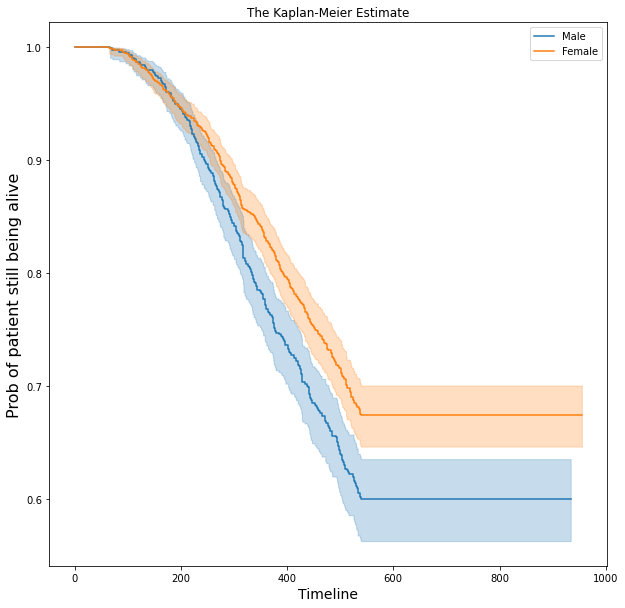

In [145]:
plt.figure(figsize = (10,10))
kmf_m.plot_survival_function()
kmf_f.plot_survival_function()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Prob of patient still being alive", fontsize = 16)
plt.xlabel("Timeline", fontsize = 14)
plt.show()


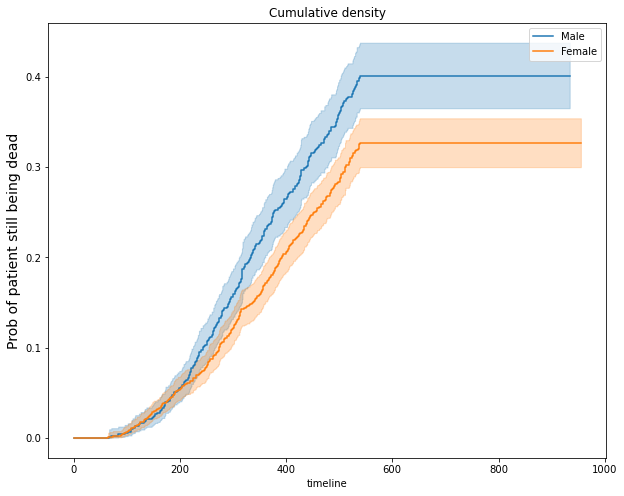

In [146]:
plt.figure(figsize = (10,8))
kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()
plt.title("Cumulative density")
plt.ylabel("Prob of patient still being dead", fontsize = 14)
plt.show()

In [148]:
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(Male['time'], event_observed = Male['dead'], label = 'Male')
naf_f.fit(Female['time'], event_observed = Female['dead'], label = 'Female')

<lifelines.NelsonAalenFitter:"Female", fitted with 1205 total observations, 826 right-censored observations>

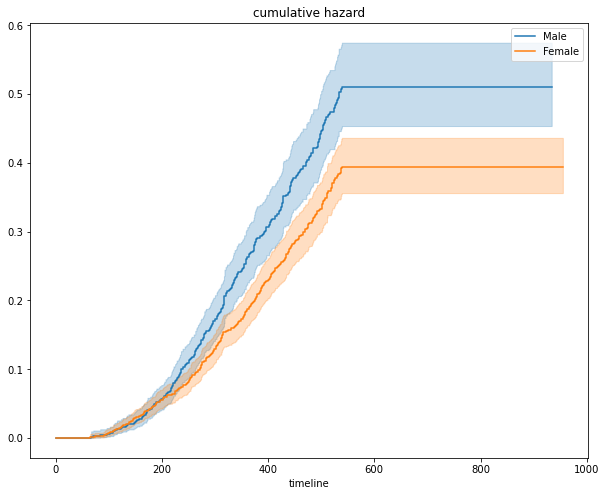

In [149]:
plt.figure(figsize = (10, 8))
plt.title('cumulative hazard')
naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()
plt.show()

In [150]:
T = Male['time']
E = Male['dead']
T1 = Female['time']
E1 = Female['dead']

In [151]:
results = logrank_test(T, T1, event_observed_A = E, event_observed_B = E1)
results

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.30 <0.005     10.33

P < 0.005, verifies that sex is statistically significant

In [195]:
#cph = CoxPHFitter()
#cph.fit(uniqueDF.drop(columns = ['Race5']), 'time', event_col = 'dead')
#cph.print_summary()

In [161]:
uniqueDF.drop(columns = ['trim1', 'trim2', 'trim3', 'trim4', 'trim5', 'trim6', 'ID', 'Age_atOnset0', 'Age_atOnset1', 'Age_atOnset2'], inplace = True)

In [194]:
uniqueDF

,time,Age,Gender1,Race1,Race2,Race3,Race4,Race5,Race6,onset_delta0,onset_delta1,onset_delta2,onset_site0,onset_site1,onset_site2,if_use_Riluzole0,if_use_Riluzole1,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostom,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,bp_diastolic,bp_systolic,pulse,weight,fvc_percent,Chloride,ASTSGOT,CK,WhiteBloodCellWBC,Glucose,AlkalinePhosphatase,Calcium,Hemoglobin,Platelets,Sodium,BloodUreaNitrogenBUN,Potassium,BilirubinTotal,RedBloodCellsRBC,Protein,Phosphorus,ALTSGPT,Albumin,Hematocrit,Bicarbonate,AbsoluteEosinophilCount,Creatinine,Gammaglutamyltransferase,AbsoluteBasophilCount,dead
0,557,48,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1250,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.004082,0.002893,0.001975,0.003198,0.003498,0.007541,0.000017,0.000002,0.022291,0.004866,0.000023,0.062252,0.003618,0.000353,0.004902,0.014896,0.074667,0.001096,0.000097,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199,0.0
10,560,38,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1875,0.2500,0.0000,0.0625,0.0625,0.0625,0.1250,0.1875,0.0625,0.2500,0.004082,0.002273,0.001852,0.004101,0.002152,0.007613,0.000023,0.000008,0.021005,0.005146,0.000027,0.067976,0.004331,0.000287,0.005007,0.016042,0.071111,0.001644,0.000111,0.008828,0.119334,0.000026,0.014076,0.014150,0.012840,0.120146,0.001964,0.000007,0.003720,0.0
17,110,41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.0625,0.0625,0.0625,0.0000,0.2500,0.004592,0.002996,0.002593,0.003224,0.003411,0.007347,0.000027,0.000006,0.019933,0.004938,0.000021,0.069689,0.004167,0.000543,0.004867,0.012334,0.074667,0.001177,0.000102,0.008460,0.110192,0.000031,0.012812,0.013971,0.013333,0.048058,0.001000,0.000013,0.006819,1.0
21,589,63,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.1875,0.1875,0.1250,0.0000,0.2500,0.004184,0.002686,0.002284,0.002799,0.003406,0.007541,0.000030,0.000010,0.015646,0.005705,0.000035,0.062967,0.004084,0.000357,0.004867,0.013750,0.069333,0.001918,0.000099,0.008262,0.106075,0.000025,0.012927,0.013080,0.014815,0.007209,0.001178,0.000008,0.001240,0.0
29,552,36,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1875,0.1875,0.1875,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.003163,0.002231,0.001975,0.003012,0.003014,0.007469,0.000029,0.000012,0.009967,0.005090,0.000050,0.064398,0.003975,0.000259,0.004902,0.014896,0.075556,0.003015,0.000095,0.007752,0.102097,0.000026,0.013358,0.012931,0.012346,0.019223,0.001669,0.000010,0.002480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,551,61,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1250,0.1250,0.2500,0.1875,0.1875,0.1875,0.1250,0.1875,0.2500,0.2500,0.2500,0.004082,0.003099,0.002531,0.002170,0.002804,0.007613,0.000028,0.000009,0.017683,0.005341,0.000022,0.066821,0.003727,0.000289,0.005007,0.014563,0.069333,0.001122,0.000099,0.008488,0.096879,0.000020,0.012856,0.012188,0.013630,0.021626,0.001311,0.000017,0.004959,0.0
16151,171,66,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2500,0.2500,0.1875,0.1875,0.1875,0.1875,0.1250,0.1250,0.1250,0.0625,0.1875,0.004184,0.002851,0.002469,0.002122,0.002339,0.007469,0.000027,0.000003,0.015218,0.004810,0.000020,0.062252,0.003783,0.000289,0.004972,0.012605,0.078222,0.001918,0.000092,0.008035,0.092815,0.000022,0.012353,0.012039,0.014321,0.016820,0.001178,0.000010,0.007439,1.0
16156,365,58,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1875,0.2500,0.2500,0.1250,0.0625,0.0625,0.0625,0.0000,0.0000,0.0000,0.2500,0.005102,0.003926,0

In [477]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from mlxtend.plotting import plot_confusion_matrix

In [201]:
targets = uniqueDF['dead']
data5 = uniqueDF.drop(columns = ['dead'])

In [226]:
train_data, test_data, train_label, test_label = train_test_split(data5, targets, test_size = 0.2)

In [227]:
scaler = StandardScaler()

scaler.fit(train_data)
train_datas = scaler.transform(train_data)

test_datas = scaler.transform(test_data)

In [242]:
model = Sequential()
model.add(Dense(100, input_shape = (57,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               5800      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [243]:
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 5)
model.fit(train_datas, train_label, epochs = 2000, validation_split = 0.2,
                 callbacks = [monitor_val_acc])

Epoch 1/2000
39/39 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7149 - val_loss: 0.4852 - val_accuracy: 0.7839
Epoch 2/2000
39/39 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8183 - val_loss: 0.4325 - val_accuracy: 0.8065
Epoch 3/2000
39/39 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8586 - val_loss: 0.4123 - val_accuracy: 0.8161
Epoch 4/2000
39/39 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8837 - val_loss: 0.3972 - val_accuracy: 0.8258
Epoch 5/2000
39/39 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8918 - val_loss: 0.3906 - val_accuracy: 0.8290
Epoch 6/2000
39/39 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.8998 - val_loss: 0.3860 - val_accuracy: 0.8419
Epoch 7/2000
39/39 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.9103 - val_loss: 0.3854 - val_accuracy: 0.8419
Epoch 

In [244]:
model.evaluate(test_datas, test_label, verbose = False)

[0.2929355800151825, 0.8814433217048645]

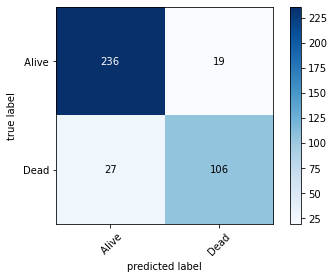

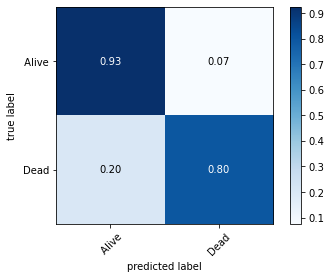

In [247]:
preds = np.round(model.predict(test_datas))

class_names = np.array([' Alive', 'Dead'])

cm = confusion_matrix(np.array(test_label), preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)
plt.show()

In [345]:
newtarget = np.zeros((1936, 6), dtype = int)

for i,j in enumerate(uniqueDF.index):
    newtarget[i] = target[j]

In [347]:
newtarget.shape

(1936, 6)

In [348]:
uniqueDF.index.shape

(1936,)

In [385]:
newtarget1 = np.zeros(1936, dtype = np.uint8) 

In [386]:
for i in range(len(newtarget)):
    newtarget1[i] = 6 - np.count_nonzero(newtarget[i] == -1)

In [387]:
newtarget1

array([6, 6, 1, ..., 6, 6, 5], dtype=uint8)

In [441]:
train_data, test_data, train_label, test_label = train_test_split(data5 , newtarget1, test_size = 0.2)

In [442]:
scaler = StandardScaler()

scaler.fit(train_data)
train_datas = scaler.transform(train_data)

test_datas = scaler.transform(test_data)

In [443]:
model2 = Sequential()
model2.add(Dense(50, input_shape = (57,), activation = 'relu'))
model2.add(Dense(7, activation = 'softmax'))
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 50)                2900      
_________________________________________________________________
dense_61 (Dense)             (None, 7)                 357       
Total params: 3,257
Trainable params: 3,257
Non-trainable params: 0
_________________________________________________________________


In [444]:
model2.fit(train_datas, train_label, epochs = 2000, validation_split = 0.2,
                 callbacks = [monitor_val_acc])

Epoch 1/2000
39/39 [==============================] - 0s 4ms/step - loss: 1.9049 - accuracy: 0.2480 - val_loss: 1.8067 - val_accuracy: 0.4677
Epoch 2/2000
39/39 [==============================] - 0s 2ms/step - loss: 1.6634 - accuracy: 0.6010 - val_loss: 1.5976 - val_accuracy: 0.6516
Epoch 3/2000
39/39 [==============================] - 0s 1ms/step - loss: 1.5415 - accuracy: 0.6591 - val_loss: 1.5339 - val_accuracy: 0.6548
Epoch 4/2000
39/39 [==============================] - 0s 1ms/step - loss: 1.5100 - accuracy: 0.6624 - val_loss: 1.5202 - val_accuracy: 0.6548
Epoch 5/2000
39/39 [==============================] - 0s 1ms/step - loss: 1.4975 - accuracy: 0.6648 - val_loss: 1.5134 - val_accuracy: 0.6581
Epoch 6/2000
39/39 [==============================] - 0s 1ms/step - loss: 1.4859 - accuracy: 0.6809 - val_loss: 1.5100 - val_accuracy: 0.6581
Epoch 7/2000
39/39 [==============================] - 0s 1ms/step - loss: 1.4749 - accuracy: 0.6931 - val_loss: 1.5065 - val_accuracy: 0.6613
Epoch 

In [445]:
model2.evaluate(test_datas, test_label)

13/13 [==============================] - 0s 1ms/step - loss: 1.4552 - accuracy: 0.7165


[1.4551588296890259, 0.7164948582649231]

In [450]:
np.around(model2.predict(test_datas))

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [431]:
test_label

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [415]:
test_label

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [452]:
preds = np.round(model2.predict(test_datas))

class_names = np.array([' Alive', 'Dead','r', '3', 'rf', 're', 'tf'])

cm = confusion_matrix(test_label, preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [551]:
data6 = data5.drop(columns = ['time'])

In [554]:
final[0]

array([[-0.68185139,  1.28391075, -0.08534682, -0.12756553, -0.09128709,
        -0.0755929 , -0.03215783],
       [ 0.19935448, -0.71754229, -0.66449136,  1.35139835,  1.86309731,
        -1.81983626, -0.09128709],
       [-0.83116168,  0.83116168, -0.31135798, -0.52736914, -2.49237943,
         0.95329106,  1.02604425],
       [ 1.02604425,  1.21102905,  0.96641326,  1.23587132,  1.29479694,
         0.55391675, -0.14742033],
       [ 0.45767701, -1.0537703 , -0.01961251,  1.08097339,  0.58793521,
        -0.91038084, -0.79326653],
       [ 1.97820747, -0.57256424, -0.47081679, -1.09212208, -1.03367043,
         0.56114829,  0.34343237],
       [-0.5036754 ,  0.02968052, -0.85560131, -0.14881271,  0.03874528,
        -1.35363793, -1.2505281 ],
       [ 0.20874849, -0.91732317, -0.43306556,  0.41639504, -0.82891756,
        -0.48083204,  0.53464741]])

In [552]:
scaler = StandardScaler()

scaler.fit(data6)
data6 = scaler.transform(data6)

#test_datas = scaler.transform(data6)

In [553]:
data6 = np.array(data6)
length = 8
wide = 7
final = np.zeros((len(data6), 8, 7))
for i in range(len(data6)):
    new = np.reshape(data6[i], (length, wide))
  #  new = np.uint8(new)
    final[i] = new

In [527]:
def plot(x):
    plt.figure(figsize =(20, 20))
    for i in range(x):
        plt.subplot(m.ceil(m.sqrt(x)), m.ceil(m.sqrt(x)), i+1)
        plt.imshow(final[i])
        plt.colorbar()
        plt.grid(False)
    plt.show()

In [555]:
final.shape

(1936, 8, 7)

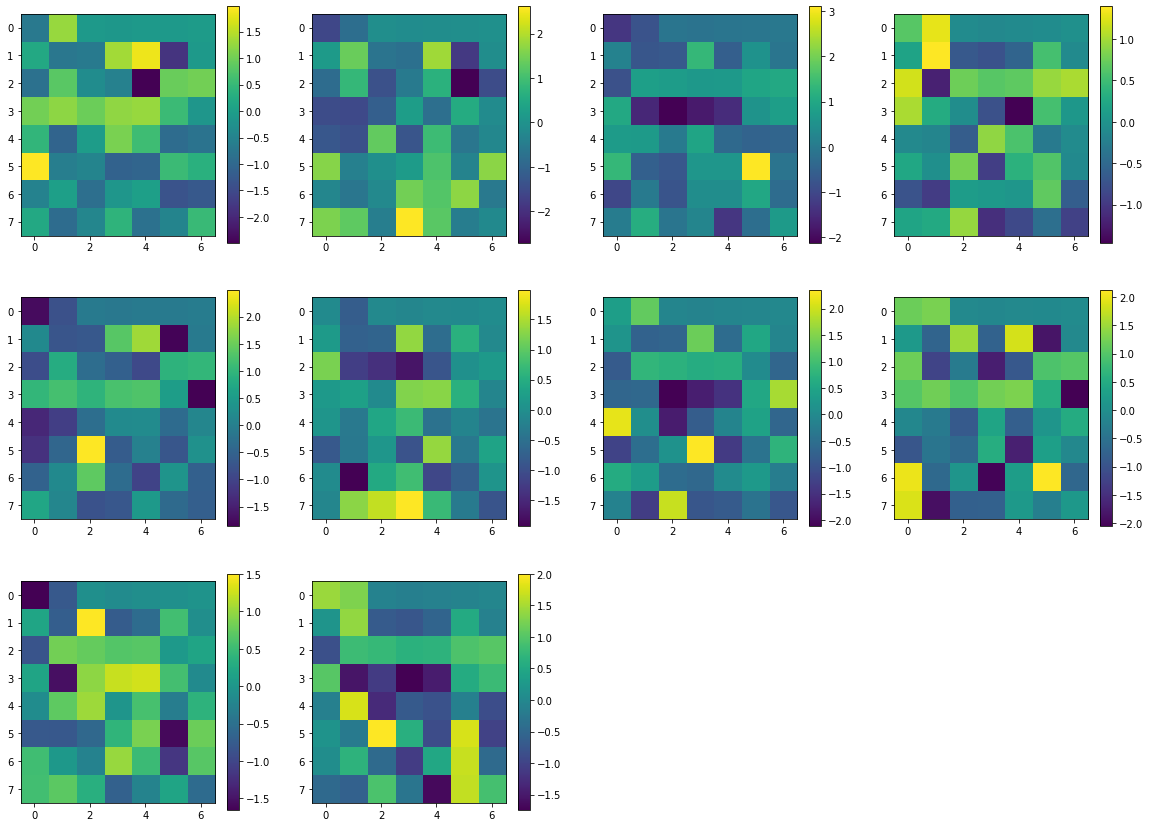

In [556]:
plot(10)

In [557]:
#final = final/255
final = np.expand_dims(final, -1)

In [558]:
train_data, test_data, train_label, test_label = train_test_split(final, targets, test_size = 0.2)

In [565]:
model3 = Sequential()
model3.add(Conv2D(64, kernel_size = (3,3), input_shape = (8, 7, 1), activation = 'relu', padding = 'same'))
#model3.add(MaxPooling2D(pool_size = (2,2)))
#model3.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
#model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model3.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 8, 7, 64)          640       
_________________________________________________________________
flatten_7 (Flatten)          (None, 3584)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3584)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 3585      
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


In [566]:
model3.fit(train_data, train_label, epochs = 100, validation_split = 0.1, callbacks = [monitor_val_acc])

Epoch 1/100
44/44 [==============================] - 1s 12ms/step - loss: 0.6110 - accuracy: 0.6741 - val_loss: 0.5485 - val_accuracy: 0.7290
Epoch 2/100
44/44 [==============================] - 0s 8ms/step - loss: 0.5449 - accuracy: 0.7172 - val_loss: 0.5069 - val_accuracy: 0.7484
Epoch 3/100
44/44 [==============================] - 0s 8ms/step - loss: 0.5181 - accuracy: 0.7423 - val_loss: 0.4913 - val_accuracy: 0.7871
Epoch 4/100
44/44 [==============================] - 0s 9ms/step - loss: 0.5066 - accuracy: 0.7423 - val_loss: 0.4779 - val_accuracy: 0.7677
Epoch 5/100
44/44 [==============================] - 0s 8ms/step - loss: 0.5065 - accuracy: 0.7423 - val_loss: 0.4741 - val_accuracy: 0.7871
Epoch 6/100
44/44 [==============================] - 0s 8ms/step - loss: 0.4906 - accuracy: 0.7516 - val_loss: 0.4695 - val_accuracy: 0.8000
Epoch 7/100
44/44 [==============================] - 0s 9ms/step - loss: 0.4871 - accuracy: 0.7516 - val_loss: 0.4649 - val_accuracy: 0.8000
Epoch 8/100


In [567]:
model3.evaluate(test_data, test_label)

13/13 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7629


[0.49325254559516907, 0.7628865838050842]